In [54]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [55]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50
CHANNELS=3

In [56]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [57]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [58]:
len(gpus)

0

In [59]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("data",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 5631 files belonging to 4 classes.


In [60]:
class_names=dataset.class_names
class_names

['cloudy', 'desert', 'green_area', 'water']

In [61]:
len(dataset)

176

In [62]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 2, 2, 0, 3, 0, 3, 2, 3, 2, 3, 3, 1, 3, 0, 0, 0, 0, 2, 3, 2, 2,
       0, 1, 3, 1, 3, 0, 0, 0, 2, 1], dtype=int32)>>


2024-04-26 10:55:17.614675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [63]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  ...
  [ 78.875     90.875    102.875   ]
  [ 79.        91.       103.      ]
  [ 79.        91.       103.      ]]

 [[ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  ...
  [ 78.875     90.875    102.875   ]
  [ 79.        91.       103.      ]
  [ 79.        91.       103.      ]]

 [[ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  [ 71.        89.       101.      ]
  ...
  [ 78.875     90.875    102.875   ]
  [ 79.        91.       103.      ]
  [ 79.        91.       103.      ]]

 ...

 [[ 98.75      99.125    107.      ]
  [ 98.75      99.125    107.      ]
  [ 98.53125   99.234375 107.03125 ]
  ...
  [ 76.34375   94.453125 104.125   ]
  [ 76.125     94.25     103.875   ]
  [ 76.125     94.25     103.875   ]]

 [[ 99.        99.       107.      ]
  [ 99.        99.       1

2024-04-26 10:55:17.641140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-26 10:55:18.934941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


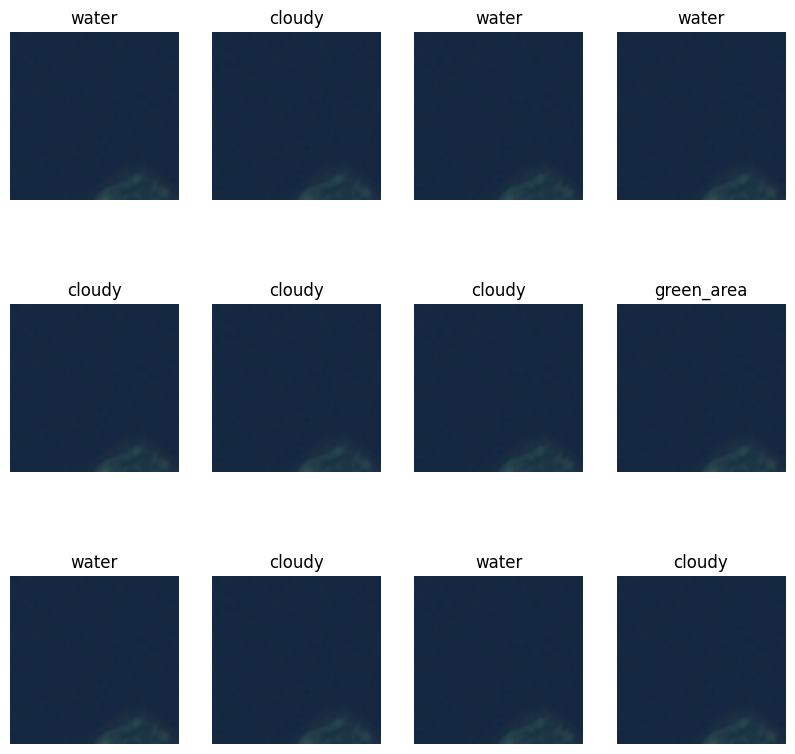

In [64]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(3):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [65]:
train_size=0.8
len(dataset)*train_size

140.8

In [66]:
train_ds=dataset.take(1766)
train_ds
len(train_ds)

176

In [67]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
len(train_ds)

176

In [68]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [69]:
len(train_ds)

140

In [70]:
len(val_ds)

17

In [71]:
len(test_ds)

19

In [72]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [73]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [74]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [75]:
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/224)
])

In [76]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 20

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 20)               │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,852 (722.08 KB)

 Trainable params: 184,852 (722.08 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [79]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.2399 - loss: 2.2750 - val_accuracy: 0.2652 - val_loss: 1.4249
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.2615 - loss: 1.4123 - val_accuracy: 0.2928 - val_loss: 1.3948
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.2696 - loss: 1.3932 - val_accuracy: 0.2947 - val_loss: 1.3821
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.2618 - loss: 1.3913 - val_accuracy: 0.2634 - val_loss: 1.3915
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.2633 - loss: 1.3947 - val_accuracy: 0.2431 - val_loss: 1.4036
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.2751 - loss: 1.3906 - val_accuracy: 0.2265 - val_loss: 1.4124
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.2698 - loss: 1.3869 - val_accuracy: 0.2707 - val_loss: 1.3925
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.2680 - loss: 1.3875 - val_accu

In [92]:
score= model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 853ms/step - accuracy: 0.2566 - loss: 1.7471


In [94]:
score

[1.7750511169433594, 0.24671052396297455]

In [95]:
history

In [96]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 140}

In [97]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [99]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [103]:
for image_batch,labels_batch in test_ds.take(1):
    
    print(image_batch[0].numpy())

[[[102.       111.       118.      ]
  [102.       111.       118.      ]
  [101.875    110.875    117.625   ]
  ...
  [105.       108.       113.      ]
  [105.       108.       113.      ]
  [105.       108.       113.      ]]

 [[102.       111.       118.      ]
  [102.       111.       118.      ]
  [101.875    110.875    117.625   ]
  ...
  [105.       108.       113.      ]
  [105.       108.       113.      ]
  [105.       108.       113.      ]]

 [[101.875    110.875    117.875   ]
  [101.875    110.875    117.875   ]
  [101.78125  110.78125  117.53125 ]
  ...
  [104.890625 107.890625 112.890625]
  [104.875    107.875    112.875   ]
  [104.875    107.875    112.875   ]]

 ...

 [[137.25     135.25     138.25    ]
  [137.25     135.25     138.25    ]
  [137.23438  135.48438  138.35938 ]
  ...
  [101.96875  109.96875  112.96875 ]
  [102.       110.       113.      ]
  [102.       110.       113.      ]]

 [[137.       135.       138.      ]
  [137.       135.       138.      ]


2024-04-26 20:58:02.474913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-26 20:58:08.107837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


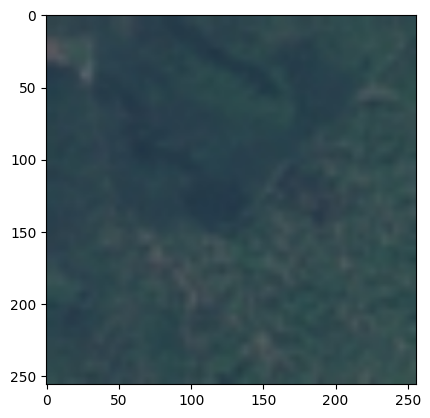

In [105]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: green_area
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
[2.4285235e-01 1.9917089e-01 2.8376558e-01 2.7385074e-01 1.0139020e-05
 3.0510013e-05 1.3352642e-05 5.4319535e-05 4.6458081e-06 3.7876455e-06
 4.2207743e-05 1.9378942e-05 4.0182772e-06 1.2618504e-05 1.4397541e-05
 3.1669530e-05 1.4616336e-05 3.6853624e-05 6.0606719e-05 7.1684312e-06]
predicted label: green_area


2024-04-26 20:58:41.952252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


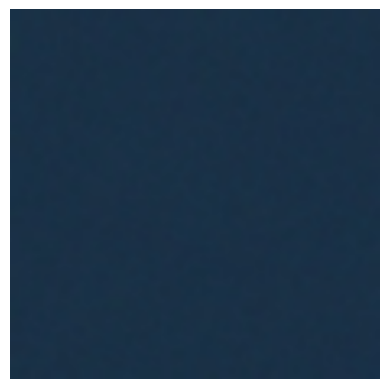

In [110]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [111]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


2024-04-26 20:58:53.666953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


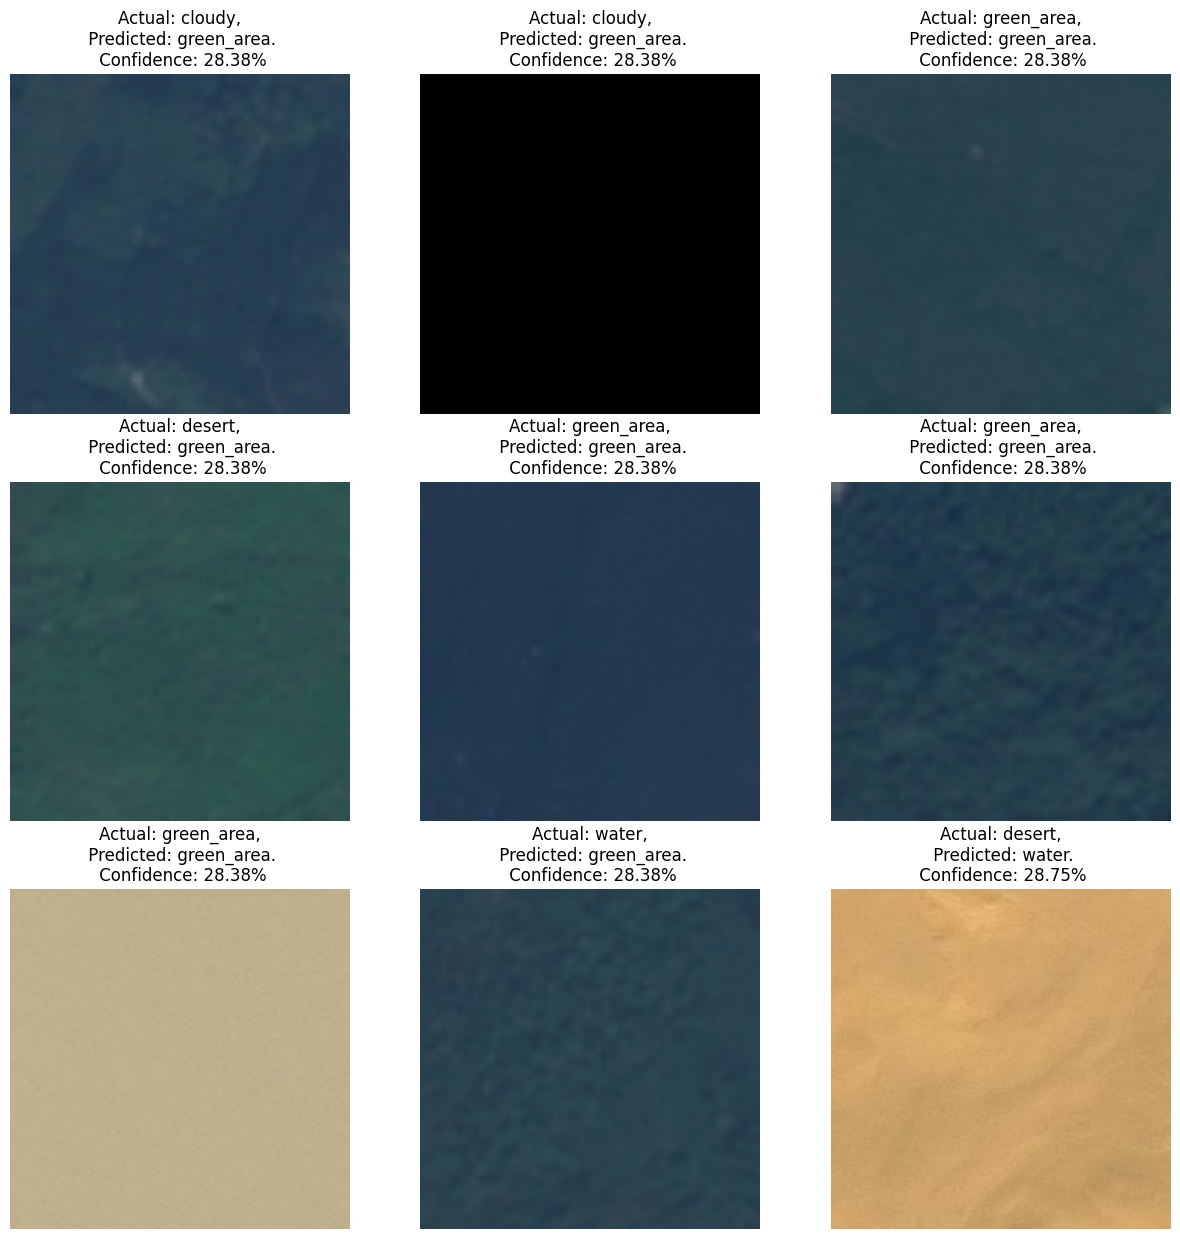

In [112]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [125]:
import os
model_version = 1
model_dir = "./model1"
for filename in os.listdir(model_dir):
    try:
        version = int(filename)
        model_version = max(model_version, version)
    except ValueError:
        pass
model_version += 1

# Save the trained model (choose either .h5 or .keras extension)
model.save(f"{model_dir}/{model_version}.h5")  # Use .h5 for HDF5 format
# or
# model.save(f"{model_dir}/{model_version}.keras")  # Use .keras for native Keras format

print(f"Model saved to: {model_dir}/{model_version}.h5")  # Adjust based on saved extension

Model saved to: ./model1/2.h5
